In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
from collections import Counter

In [2]:
import os
os.chdir(r'C:\\Users\\User\\Desktop\\data science projects\\relax_challenge')

# Data Over view

In [3]:
engagement = pd.read_csv('takehome_user_engagement.csv')
#user = pd.read_csv('takehome_users.csv')

In [4]:
engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [5]:

user = pd.read_csv('takehome_users.csv',encoding='latin-1')

In [6]:
engagement.describe()

,user_id,visited
count,207917.000000,207917.0
mean,5913.314197,1.0
std,3394.941674,0.0
min,1.000000,1.0
25%,3087.000000,1.0
50%,5682.000000,1.0
75%,8944.000000,1.0
max,12000.000000,1.0


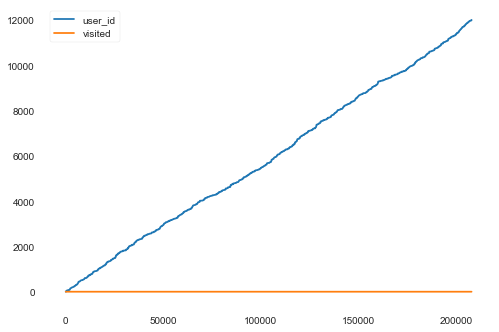

In [7]:
engagement.plot()

In [8]:
user.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [9]:
user.describe()

,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
count,12000.00000,8.823000e+03,12000.000000,12000.000000,12000.000000,6417.000000
mean,6000.50000,1.379279e+09,0.249500,0.149333,141.884583,5962.957145
std,3464.24595,1.953116e+07,0.432742,0.356432,124.056723,3383.761968
min,1.00000,1.338452e+09,0.000000,0.000000,0.000000,3.000000
25%,3000.75000,1.363195e+09,0.000000,0.000000,29.000000,3058.000000
50%,6000.50000,1.382888e+09,0.000000,0.000000,108.000000,5954.000000
75%,9000.25000,1.398443e+09,0.000000,0.000000,238.250000,8817.000000
max,12000.00000,1.402067e+09,1.000000,1.000000,416.000000,11999.000000


# Data Preprocessing

In [11]:
data = pd.merge(engagement, user, how='left', left_on='user_id', right_on='object_id')
data.head()

,time_stamp,user_id,visited,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,2014-04-22 03:53:30,1,1,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2013-11-15 03:45:04,2,1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,2013-11-29 03:45:04,2,1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
3,2013-12-09 03:45:04,2,1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
4,2013-12-25 03:45:04,2,1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0


In [13]:
data.shape

(207917, 13)

In [15]:
data.dtypes

time_stamp                     object
user_id                         int64
visited                         int64
object_id                       int64
creation_time                  object
name                           object
email                          object
creation_source                object
last_session_creation_time    float64
opted_in_to_mailing_list        int64
enabled_for_marketing_drip      int64
org_id                          int64
invited_by_user_id            float64
dtype: object

In [17]:
data.time_stamp = pd.to_datetime(data.time_stamp)
data = data.set_index('time_stamp')
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 207917 entries, 2014-04-22 03:53:30 to 2014-01-26 08:57:12
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   user_id                     207917 non-null  int64  
 1   visited                     207917 non-null  int64  
 2   object_id                   207917 non-null  int64  
 3   creation_time               207917 non-null  object 
 4   name                        207917 non-null  object 
 5   email                       207917 non-null  object 
 6   creation_source             207917 non-null  object 
 7   last_session_creation_time  207917 non-null  float64
 8   opted_in_to_mailing_list    207917 non-null  int64  
 9   enabled_for_marketing_drip  207917 non-null  int64  
 10  org_id                      207917 non-null  int64  
 11  invited_by_user_id          116887 non-null  float64
dtypes: float64(2), int64(6), object(4)
mem

In [18]:
data.isna().sum()

user_id                           0
visited                           0
object_id                         0
creation_time                     0
name                              0
email                             0
creation_source                   0
last_session_creation_time        0
opted_in_to_mailing_list          0
enabled_for_marketing_drip        0
org_id                            0
invited_by_user_id            91030
dtype: int64

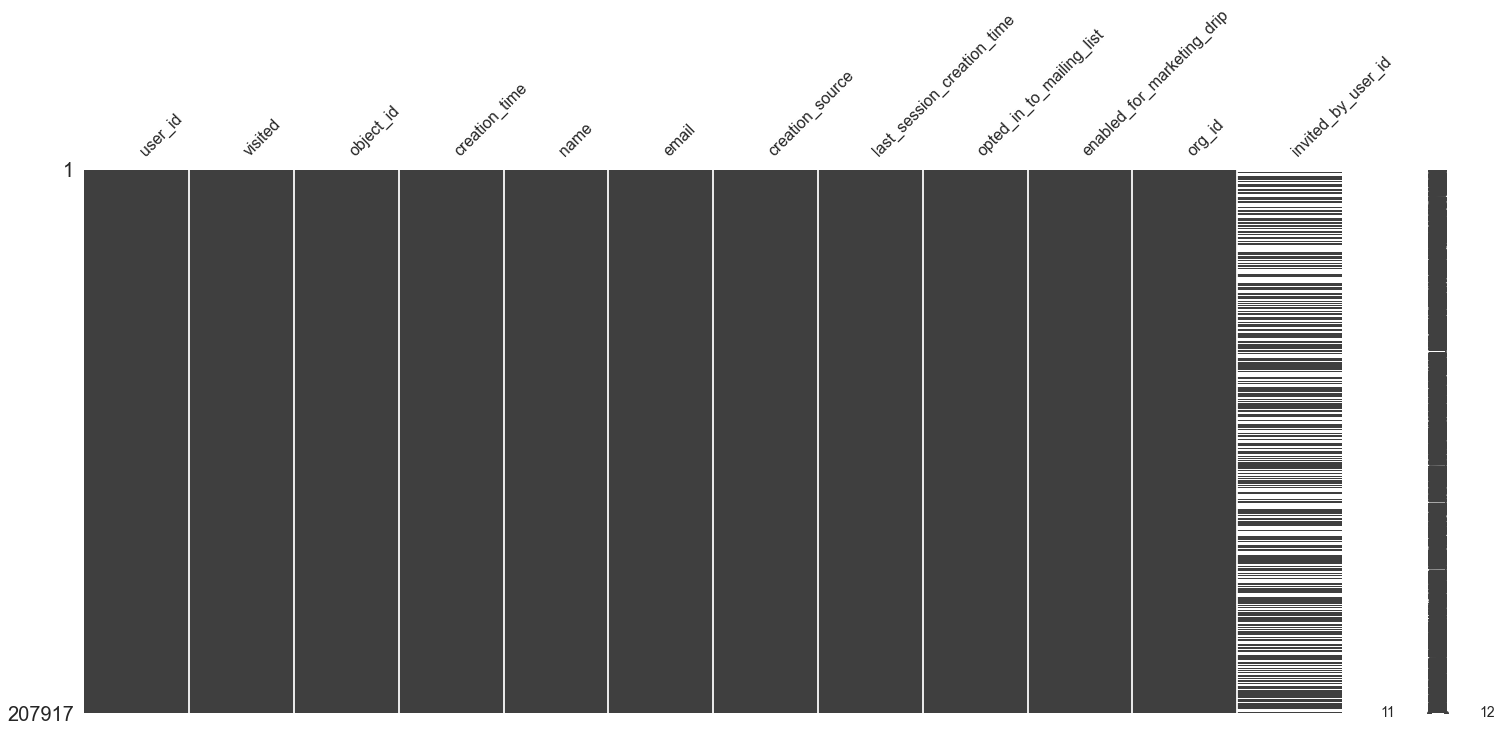

In [19]:
import missingno as msno 
msno.matrix(data) 

In [20]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [24]:
data['invited_by_user_id'] = data['invited_by_user_id'].fillna(0)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 207917 entries, 2014-04-22 03:53:30 to 2014-01-26 08:57:12
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   user_id                     207917 non-null  int64  
 1   visited                     207917 non-null  int64  
 2   object_id                   207917 non-null  int64  
 3   creation_time               207917 non-null  object 
 4   name                        207917 non-null  object 
 5   email                       207917 non-null  object 
 6   creation_source             207917 non-null  object 
 7   last_session_creation_time  207917 non-null  float64
 8   opted_in_to_mailing_list    207917 non-null  int64  
 9   enabled_for_marketing_drip  207917 non-null  int64  
 10  org_id                      207917 non-null  int64  
 11  invited_by_user_id          207917 non-null  float64
dtypes: float64(2), int64(6), object(4)
mem

# Feature engineering

In [25]:

data1 = data.drop(['object_id', 'name', 'email'], axis=1)
data1 = data1.sort_index()

In [26]:
data1.head()

,user_id,visited,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
time_stamp,,,,,,,,,
2012-05-31 08:20:06,10012,1,2012-05-31 08:20:06,ORG_INVITE,1.338452e+09,0,1,225,7104.0
2012-05-31 15:47:36,3428,1,2012-05-31 15:47:36,SIGNUP_GOOGLE_AUTH,1.352822e+09,1,0,166,0.0
2012-05-31 17:19:37,9899,1,2012-05-31 17:19:37,ORG_INVITE,1.338485e+09,0,0,138,9899.0
2012-05-31 21:58:33,1693,1,2012-05-31 21:58:33,SIGNUP_GOOGLE_AUTH,1.399932e+09,0,1,50,0.0
2012-06-01 00:17:30,6102,1,2012-06-01 00:17:30,ORG_INVITE,1.339719e+09,0,0,34,6102.0


# Obtaining List of Adopted Users

In [27]:

per_user_7day_count = data1.groupby('user_id')['visited'].rolling('7d').count()
per_user_7day_count.head()

user_id  time_stamp         
1        2014-04-22 03:53:30    1.0
2        2013-11-15 03:45:04    1.0
         2013-11-29 03:45:04    1.0
         2013-12-09 03:45:04    1.0
         2013-12-25 03:45:04    1.0
Name: visited, dtype: float64

In [28]:
per_user_7day_count_df = per_user_7day_count.reset_index()
per_user_7day_count_df.head()

,user_id,time_stamp,visited
0,1,2014-04-22 03:53:30,1.0
1,2,2013-11-15 03:45:04,1.0
2,2,2013-11-29 03:45:04,1.0
3,2,2013-12-09 03:45:04,1.0
4,2,2013-12-25 03:45:04,1.0


In [29]:
adopted_users_df = per_user_7day_count_df.loc[per_user_7day_count_df['visited']>=3]
adopted_users_df.head()

,user_id,time_stamp,visited
9,2,2014-02-09 03:45:04,3.0
10,2,2014-02-13 03:45:04,3.0
27,10,2013-02-19 22:08:03,3.0
30,10,2013-03-02 22:08:03,3.0
31,10,2013-03-05 22:08:03,3.0


In [30]:
adopted_users = adopted_users_df[['user_id']].drop_duplicates()
adopted_users = adopted_users.reset_index(drop=True)
adopted_users.head()

,user_id
0,2
1,10
2,20
3,33
4,42


# Adopted User EDA

In [31]:
data1.head()

,user_id,visited,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
time_stamp,,,,,,,,,
2012-05-31 08:20:06,10012,1,2012-05-31 08:20:06,ORG_INVITE,1.338452e+09,0,1,225,7104.0
2012-05-31 15:47:36,3428,1,2012-05-31 15:47:36,SIGNUP_GOOGLE_AUTH,1.352822e+09,1,0,166,0.0
2012-05-31 17:19:37,9899,1,2012-05-31 17:19:37,ORG_INVITE,1.338485e+09,0,0,138,9899.0
2012-05-31 21:58:33,1693,1,2012-05-31 21:58:33,SIGNUP_GOOGLE_AUTH,1.399932e+09,0,1,50,0.0
2012-06-01 00:17:30,6102,1,2012-06-01 00:17:30,ORG_INVITE,1.339719e+09,0,0,34,6102.0


In [33]:
data1['adopted_user'] = data1['user_id'].apply(lambda x: x in adopted_users.values)
user['adopted_user'] = user['object_id'].apply(lambda x: x in adopted_users.values)
user['invited_by_user'] = user['invited_by_user_id'].apply(lambda x: 1 if x>0 else 0)
user[['object_id', 'adopted_user']].head(5)

,object_id,adopted_user
0,1,False
1,2,True
2,3,False
3,4,False
4,5,False


In [34]:
creation_source_df = user.pivot_table(index='adopted_user', columns='creation_source', values='object_id', aggfunc='count', fill_value=0)
creation_source_df.loc['Fraction_Positive'] = round(creation_source_df.loc[True]/creation_source_df.sum(), 2)
creation_source_df

creation_source,GUEST_INVITE,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH
adopted_user,,,,,
False,1803.00,3701.00,1947.00,1794.00,1153.00
True,360.00,553.00,164.00,293.00,232.00
Fraction_Positive,0.17,0.13,0.08,0.14,0.17


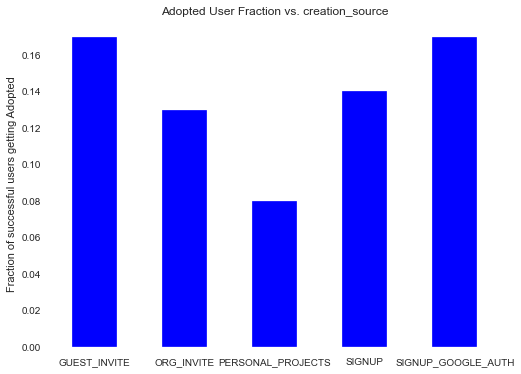

In [35]:

fig=plt.figure(figsize=(8, 6))
idx = range(5)
axes=fig.add_subplot(1, 1, 1)
plt.bar(height=creation_source_df.loc['Fraction_Positive'], x=idx, color='b', width=0.5, label='creation_source')
plt.xticks(idx, creation_source_df.columns)
plt.ylabel('Fraction of successful users getting Adopted')
plt.title('Adopted User Fraction vs. creation_source')
plt.show()

In [36]:

opted_in_to_mailing_list_df = user.pivot_table(index='adopted_user', columns='opted_in_to_mailing_list', values='object_id', aggfunc='count', fill_value=0)
opted_in_to_mailing_list_df.loc['Fraction_Positive'] = round(opted_in_to_mailing_list_df.loc[True]/opted_in_to_mailing_list_df.sum(), 2)
opted_in_to_mailing_list_df

opted_in_to_mailing_list,0,1
adopted_user,,
False,7818.00,2580.00
True,1188.00,414.00
Fraction_Positive,0.13,0.14


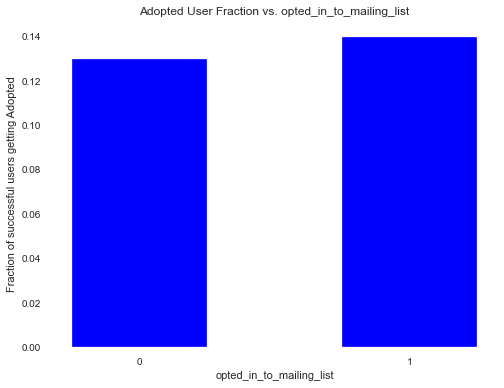

In [37]:

fig=plt.figure(figsize=(8, 6))
idx = range(2)
axes=fig.add_subplot(1, 1, 1)
plt.bar(height=opted_in_to_mailing_list_df.loc['Fraction_Positive'], x=idx, color='b', width=0.5, label='opted_in_to_mailing_list')
plt.xticks(idx, opted_in_to_mailing_list_df.columns)
plt.xlabel('opted_in_to_mailing_list')
plt.ylabel('Fraction of successful users getting Adopted')
plt.title('Adopted User Fraction vs. opted_in_to_mailing_list')
plt.show()

In [38]:
enabled_for_marketing_drip_df = user.pivot_table(index='adopted_user', columns='enabled_for_marketing_drip', values='object_id', aggfunc='count', fill_value=0)
enabled_for_marketing_drip_df.loc['Fraction_Positive'] = round(enabled_for_marketing_drip_df.loc[True]/enabled_for_marketing_drip_df.sum(), 2)
enabled_for_marketing_drip_df

enabled_for_marketing_drip,0,1
adopted_user,,
False,8852.00,1546.00
True,1356.00,246.00
Fraction_Positive,0.13,0.14


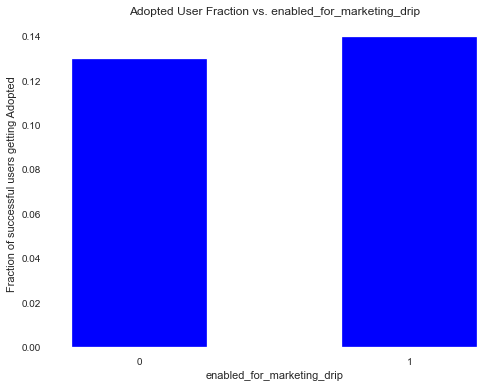

In [39]:
fig=plt.figure(figsize=(8, 6))
idx = range(2)
axes=fig.add_subplot(1, 1, 1)
plt.bar(height=enabled_for_marketing_drip_df.loc['Fraction_Positive'], x=idx, color='b', width=0.5, label='enabled_for_marketing_drip')
plt.xticks(idx, enabled_for_marketing_drip_df.columns)
plt.xlabel('enabled_for_marketing_drip')
plt.ylabel('Fraction of successful users getting Adopted')
plt.title('Adopted User Fraction vs. enabled_for_marketing_drip')
plt.show()

In [41]:
invited_by_user_df = user.pivot_table(index='adopted_user', columns='invited_by_user', values='object_id', aggfunc='count', fill_value=0)
invited_by_user_df.loc['Fraction_Positive'] = round(invited_by_user_df.loc[True]/invited_by_user_df.sum(), 2)
invited_by_user_df

invited_by_user,0,1
adopted_user,,
False,4894.00,5504.00
True,689.00,913.00
Fraction_Positive,0.12,0.14


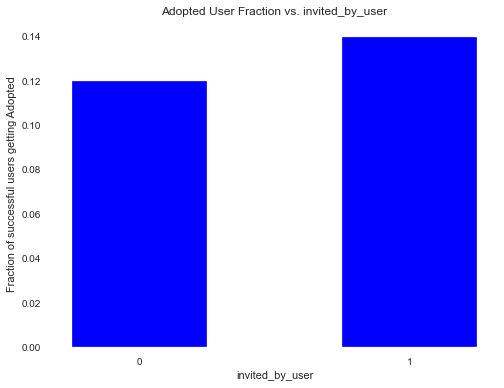

In [43]:
 fig=plt.figure(figsize=(8, 6))
idx = range(2)
axes=fig.add_subplot(1, 1, 1)
plt.bar(height=invited_by_user_df.loc['Fraction_Positive'], x=idx, color='b', width=0.5, label='invited_by_user')
plt.xticks(idx, invited_by_user_df.columns)
plt.xlabel('invited_by_user')
plt.ylabel('Fraction of successful users getting Adopted')
plt.title('Adopted User Fraction vs. invited_by_user')
plt.show()

# Modeling

In [44]:
users_df = user.drop(['object_id', 'creation_time', 'name', 'email', 'invited_by_user_id'], axis=1)

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix

In [47]:
median = users_df['last_session_creation_time'].median()
mean = users_df['last_session_creation_time'].mean()
creation_source_dict = {'GUEST_INVITE':0, 'ORG_INVITE':1, 'PERSONAL_PROJECTS':2, 'SIGNUP':3, 'SIGNUP_GOOGLE_AUTH':4}
adopted_user_dict = {'False': 0, 'True': 1}
min_max_scaler = preprocessing.MinMaxScaler()

users_df['last_session_creation_time'] = users_df['last_session_creation_time'].fillna(median)
users_df['last_session_creation_time'] = min_max_scaler.fit_transform(users_df['last_session_creation_time'].values.reshape(-1, 1))
users_df['creation_source'] = users_df['creation_source'].map(creation_source_dict)
users_df['adopted_user'] = users_df['adopted_user'].map({True:1, False:0})
users_df.head()

,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,adopted_user,invited_by_user
0,0,0.938254,1,0,11,0,1
1,1,0.908366,0,0,1,1,1
2,1,0.397434,0,0,94,0,1
3,0,0.483504,0,0,1,0,1
4,0,0.320639,0,0,193,0,1


In [48]:
X = users_df.drop('adopted_user', axis=1)
y = users_df['adopted_user']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
X2_train, X2_test = X_train.drop('last_session_creation_time', axis=1), X_test.drop('last_session_creation_time', axis=1)

In [49]:
rf = RandomForestClassifier()
param_grid = {'n_estimators': [100, 200, 500], 
             'max_depth': [5, 10, 20], 
             'max_features': [2, 3, 5],
             'min_samples_leaf': [1, 3, 7], 
             'min_samples_split': [2, 5, 10]}

rf_cv = RandomizedSearchCV(rf, param_grid, cv=5)
rf_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [5, 10, 20],
                                        'max_features': [2, 3, 5],
                                        'min_samples_leaf': [1, 3, 7],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 500]})

In [50]:

rf_cv.best_params_

{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 3,
 'max_depth': 5}

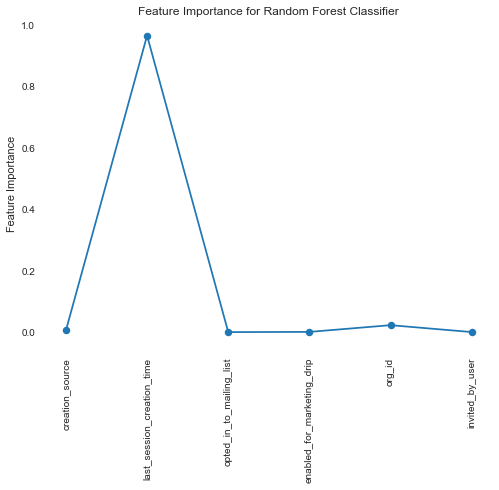

In [51]:
fig = plt.figure(figsize=(8, 6))
axes = fig.add_subplot(1, 1, 1)
axes.plot(rf_cv.best_estimator_.feature_importances_, marker='.', markersize=15)
plt.xticks(range(len(rf_cv.best_estimator_.feature_importances_)), X_train.columns, rotation=90)
axes.set(ylabel='Feature Importance', title='Feature Importance for Random Forest Classifier')
plt.show()

In [55]:
pd.DataFrame(rf_cv.best_estimator_.feature_importances_, index = X_train.columns, columns=['Feature Importance'])

,Feature Importance
creation_source,0.006477
last_session_creation_time,0.965517
opted_in_to_mailing_list,0.001184
enabled_for_marketing_drip,0.001823
org_id,0.023697
invited_by_user,0.001303


In [56]:
users_df[users_df['adopted_user']==1]['last_session_creation_time'].describe()

count    1602.000000
mean        0.900260
std         0.202643
min         0.049202
25%         0.969870
50%         0.988188
75%         0.995962
max         0.997791
Name: last_session_creation_time, dtype: float64

In [57]:
users_df[users_df['adopted_user']==0]['last_session_creation_time'].describe()

count    10398.000000
mean         0.619300
std          0.252676
min          0.000000
25%          0.461297
50%          0.698523
75%          0.757715
max          1.000000
Name: last_session_creation_time, dtype: float64

In [58]:
y_pred = rf_cv.predict(X_test)

In [59]:

confusion_matrix(y_test, y_pred)

array([[1992,   88],
       [  93,  227]], dtype=int64)

In [60]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2080
           1       0.72      0.71      0.71       320

    accuracy                           0.92      2400
   macro avg       0.84      0.83      0.84      2400
weighted avg       0.92      0.92      0.92      2400

